In [16]:
#インストール
%pip install mecab-python3 janome unidic-lite unidic wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd

# テキスト読み込み
file_path = 'C:\WorkSpace\Practice\テキスト3.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# データをPandasのDataFrameに格納
df = pd.DataFrame(lines, columns=['テキスト'])

# 不要な空行の削除
df.dropna(subset=['テキスト'], inplace=True)


In [18]:
from janome.tokenizer import Tokenizer

# Janomeを用いた形態素解析関数
t = Tokenizer()
def extract_nouns(text, tokenizer):
    words = [token.surface for token in tokenizer.tokenize(text) if token.part_of_speech.startswith('名詞')]
    return ' '.join(words)

# 各行に形態素解析を適用し、名詞のみを抽出
df['名詞のみ'] = df['テキスト'].apply(lambda x: extract_nouns(x, t))


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDFを用いてベクトル化し、キーワードを抽出
vectorizer = TfidfVectorizer(stop_words=['こと', 'ため', 'よう', 'もの', 'これ', 'それ', 'どこ', 'そこ', 'たい', 'ほか', 'さっき', 'びと'])
X = vectorizer.fit_transform(df['名詞のみ'])

# ベクトル化されたデータをDataFrameに変換
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# TOP30のキーワードを特定
top_30_keywords = df_vectorized.sum().nlargest(30)
print("TOP30のキーワード:")
print(top_30_keywords)



TOP30のキーワード:
日本     1.744009
高気圧    1.690438
梅雨     1.465036
台風     1.246423
明け     1.231084
気圧     1.221135
配置     1.114810
発生     0.894458
湿度     0.851744
小笠原    0.769652
参照     0.754117
典型     0.720898
積乱雲    0.713657
前後     0.707107
立秋     0.707107
地方     0.697487
接近     0.677116
夕立     0.665367
勢力     0.664910
真夏     0.638540
上昇     0.623927
列島     0.608263
日射     0.606671
前線     0.586648
空気     0.536541
太平洋    0.511109
局地     0.507509
等圧線    0.496834
体感     0.470525
温度     0.470525
dtype: float64


In [25]:
print(df_vectorized.sum())
#open('result.csv',"w",encoding=int)

10       0.289819
23       0.428252
つまり      0.289819
オホーツク    0.330380
レジャー     0.256513
           ...   
配置       1.114810
間隔       0.304131
陸風       0.384660
非常       0.304131
高気圧      1.690438
Length: 77, dtype: float64


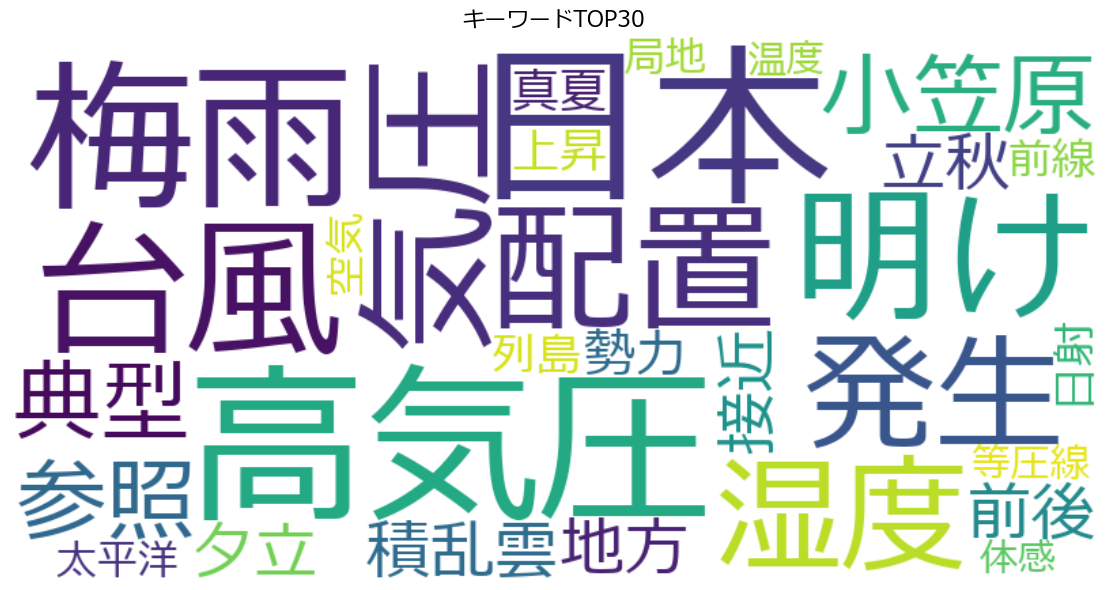

In [13]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud

# 日本語フォント設定（wordcloud用）
plt.rcParams['font.family'] = 'Meiryo'

# ワードクラウドの作成
wordcloud = WordCloud(width=800, height=400, background_color='white',
            font_path='C:\Windows\Fonts\meiryo.ttc').generate_from_frequencies(top_30_keywords)

# ワードクラウドの表示
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('キーワードTOP30', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()
